Objective: 
- Code a LeNet model using Keras Functional API.
- Use fashion_mnist dataset available with Keras API to train and test the model.

In the first part of the notebook, we are loading the whole Fashion-MNIST dataset in the memory, going fwd if we are planning to use a large dataset it will be ideal if we load, pre-process and train with batches of data.
For batch processing, tf.data API has better performance and also gives us more room to apply transformations and data-augmentations.

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [ ]:
classnames = ['top', 'trouser', 'pullover','dress',
              'coat', 'sandal', 'shirt','sneaker',
              'bag','ankle-boot']

(x_train,y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train_samples, train_img_h, train_img_w = x_train.shape
x_test_samples, test_img_h, test_img_w = x_test.shape

print(f"Nb. of Train Examles = {x_train_samples}")
print(f"Input Image shape = {train_img_h, train_img_w}")      

4431872/4422102 [==============================] - 0s 0us/step
Nb. of Train Examles = 60000
Input Image shape = (28, 28)


In [ ]:
x_train.shape[1:] + (1,)

(28, 28, 1)

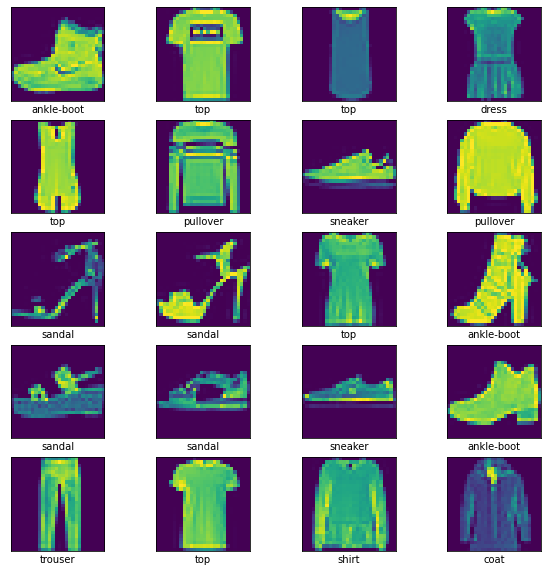

In [ ]:
plt.figure(figsize=(10,10))

for i in range(20):
  plt.subplot(5,4,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(classnames[y_train[i]])
  plt.imshow(x_train[i])  
plt.show()

In [ ]:
def lenet_model(input_shape):
  inputs = layers.Input(shape=input_shape,name='Input')
  conv1 = layers.Conv2D(filters=6,kernel_size=5,padding='same',activation='sigmoid',name='conv1')(inputs)
  pool1 = layers.AvgPool2D(pool_size=(2,2), strides=2,name='pool1')(conv1)
  conv2 = layers.Conv2D(filters=16,kernel_size=5,activation='sigmoid',name='conv2')(pool1)
  pool2 = layers.AvgPool2D(pool_size=(2,2), strides=2,name='pool2')(conv2)
  flat = layers.Flatten(name='flatten')(pool2)
  hidden1 = layers.Dense(120, activation='sigmoid',name='hidden1')(flat)
  hidden2 = layers.Dense(84, activation='sigmoid',name='hidden2')(hidden1)
  outputs = layers.Dense(10, activation='sigmoid',name='Output')(hidden2)  
  return models.Model(inputs=inputs, outputs=outputs)

mdl = lenet_model((28,28,1))
mdl.summary()

mdl.compile(optimizer='adam',
            loss=losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = mdl.fit(x_train, 
                  y_train,
                  epochs=20,
                  validation_data=(x_test, y_test))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
pool1 (AveragePooling2D)     (None, 14, 14, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
pool2 (AveragePooling2D)     (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 120)               4812

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 46s 24ms/step - loss: 0.7831 - accuracy: 0.7095 - val_loss: 0.5614 - val_accuracy: 0.7860
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4868 - accuracy: 0.8173 - val_loss: 0.4574 - val_accuracy: 0.8310
Epoch 3/20
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4115 - accuracy: 0.8473 - val_loss: 0.4185 - val_accuracy: 0.8457
Epoch 4/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3680 - accuracy: 0.8642 - val_loss: 0.3768 - val_accuracy: 0.8617
Epoch 5/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3374 - accuracy: 0.8759 - val_loss: 0.3588 - val_accuracy: 0.8689
Epoch 6/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3225 - accuracy: 0.8800 - val_loss: 0.3498 - val_accuracy: 0.8731
Epoch 7/20
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3052 - accuracy: 0.8865 - val_loss: 0.3479 - val_accura

313/313 - 4s - loss: 0.2623 - accuracy: 0.9021
Achieved Accuracy and Loss=0.9021000266075134 0.2623307704925537


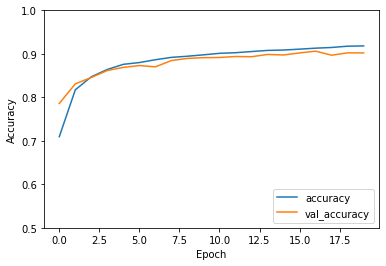

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = mdl.evaluate(x_test,  y_test, verbose=2)
print(f"Achieved Accuracy and Loss={test_acc} {test_loss}")